In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

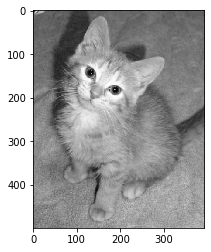

In [2]:
im = Image.open('../data/cat.png').convert('L')
im = np.array(im, dtype='float32')
plt.imshow(im.astype('uint8'), cmap='gray')

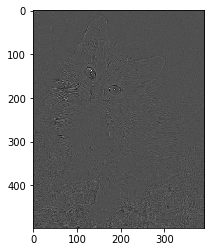

In [3]:
# 先转化为tensor
im = torch.from_numpy(im.reshape((1,1,im.shape[0],im.shape[1])))
# 定义一个算子对其轮廓进行检测
conv1 = nn.Conv2d(1, 1, 3, bias=False)
sobel_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype='float32')
sobel_kernel = sobel_kernel.reshape((1,1,3,3))
conv1.weight.data = torch.from_numpy(sobel_kernel)
edge1 = conv1(Variable(im))
edge1 = edge1.data.squeeze().numpy()
plt.imshow(edge1, cmap='gray')

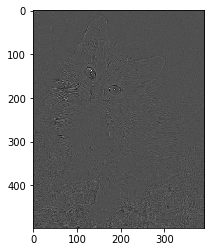

In [4]:
sobel_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype='float32')
sobel_kernel = sobel_kernel.reshape((1,1,3,3))
weight = Variable(torch.from_numpy(sobel_kernel))
edge2 = F.conv2d(Variable(im), weight)
edge2 = edge2.data.squeeze().numpy()
plt.imshow(edge2, cmap='gray')


In [5]:
# nn.MaxPool2d
pool1 = nn.MaxPool2d(2,2)
print('before max pool, image shape: {}x{}'
      .format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape:{}x{}'
      .format(small_im1.shape[0], small_im1.shape[1]))


before max pool, image shape: 500x394
after max pool, image shape:250x197


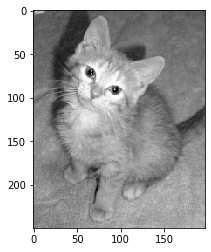

In [12]:
plt.imshow(small_im1,cmap='gray')

before max pool, image shape:500x394
after max pool, image shape:250x197


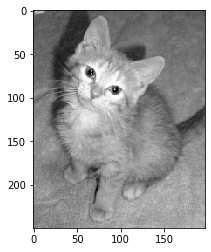

In [14]:
# 池化层 F.max_pool2d
print('before max pool, image shape:{}x{}'
      .format(im.shape[2], im.shape[3]))
small_im2 = F.max_pool2d(Variable(im), 2, 2)
small_im2 = small_im2.data.squeeze().numpy()
print('after max pool, image shape:{}x{}'
      .format(small_im2.shape[0], small_im2.shape[1]))
plt.imshow(small_im2, cmap='gray')